## <b>Training Neural Network</b>

### <b>Overview</b>

1. Onetime setup

* Activation functions
* Preprocessing
* Weight initalization
* Regularization
* Gradient checking
--------------------------
2. Training dynamics

* Babysitting the learning process
* Parameter update
* Hyperparameter optimization
--------------------------

3. Evaluation

* Model Ensembles

-----------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### <b> 1. Activation function</b>

1. Sigmoid : $sigmoid(x) = \frac{1}{1+e^{(-x)}}$  \



-------------------------------------
* Đầu ra trong khoảng (0,1)
* Được sử dụng phổ biến trong quá khứ
--------------------------------------
  <b>3 Vấn đề </b>

* Khi mạng bão hòa(saturated) sẽ "kill" gradient. Hiểu đơn giản hàm sigmoid bị chặng bởi 0 và 1 nên khi x và lớn hoặc càng nhỏ thì gradient ~ 0 và ko thể cập nhật trọng số
* Hàm sigmoid ko nhận 0 làm trung tâm
Vấn đề ở đây nếu đầu vào là toàn dương và ta có y = w0*x0 + w1*x1 và muốn đầu w0 giảm và w1 tăng để tối ưu hóa nhưng lại không thể thực hiện đồng thời và chỉ có thể tăng hoặc giảm từng cái --> tối ưu chậm
* Hàm exp() yêu cầu bộ nhớ tính toán lớn

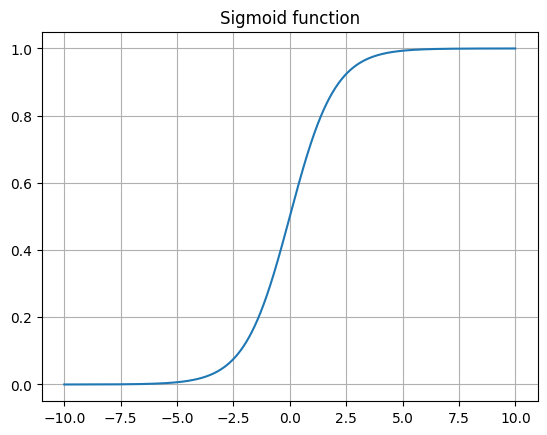

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-10,10,0.01)
y = sigmoid(x)

plt.plot(x,y)
plt.title("Sigmoid function")
plt.grid(True)
plt.show()

2. Tanh: $tanh(x) = \frac{e^{(x)} - e^{(-x)}}{e^x + e^{(-x)}}$

- Tương tự như hàm Sigmoid nhưng đã đã cải tiến để lấy 0 làm trung tâm

In [ ]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

[]

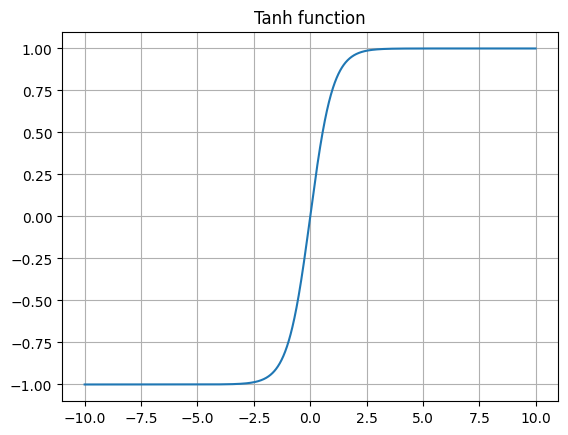

In [ ]:
x = np.arange(-10,10,0.01)
y = tanh(x)
plt.plot(x,y)
plt.title("Tanh function")
plt.grid(True)
plt.plot()


3. ReLU ( Rectified Linear Unit) : $f(x) = max(0,x)$

Tích cực:
* Không còn bị bão hòa(saturate) ở miền  +
* Tính toán đơn giản ( ko cần dùng exp() mà chỉ cần dùng max()) nên x6 lần tốc độ so với sigmoid/tanh
* Thực tế hơn so với sigmoid/tanh

Tiêu cực:
* Ko có 0 làm trung tâm giống sigmoid
* Gradient ntn nếu x < 0 ??? -> "Kill Gradient" -> không thể update -> không thể active lại như sigmoid/tanh


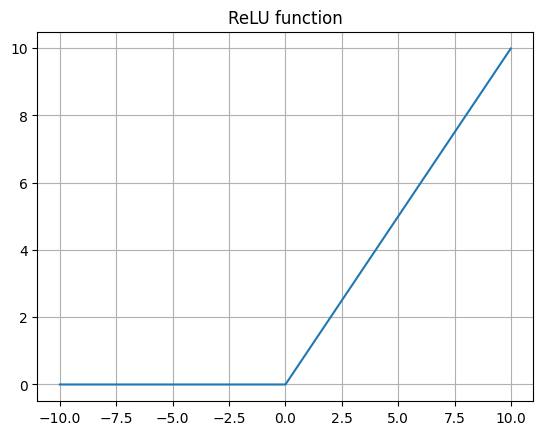

In [ ]:
def relu(x):
  return np.maximum(0,x)
x = np.arange(-10,10,0.01)
y = relu(x)

plt.plot(x,y)
plt.title("ReLU function")
plt.grid(True)
plt.show()

4. Leaky ReLU: $f(x) = max(\alpha*x,x)$

* Không lo bị bão hòa(saturate)
* Tính toán đơn giản -> nhanh
* Không bị "die"

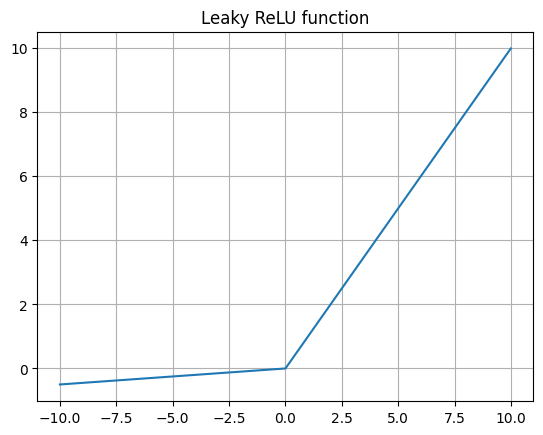

In [ ]:
def leaky_relu(a,x):
  return np.maximum(a*x,x)
x = np.arange(-10,10,0.01)
y = leaky_relu(0.05,x)

plt.plot(x,y)
plt.title("Leaky ReLU function")
plt.grid(True)
plt.show()

5. ELU ( Exponential Linear Units)
$$
f(x) = \left\{
\begin{array}{ll}
x & \text{if } x > 0 \\
\alpha(e^{x} - 1) & \text{if } x \leq 0
\end{array}
\right.
$$



* Có tất cả ưu điểm của ReLU
* Gần coi 0 là center
* Bằng cách bão hòa ở miền âm : khi giá trị đầu vào âm hơn thì ELU sẽ ngăn chặn bao gồm cả noise
* <b> Sử dụng exp() nên độ phức tạp lớn </b>

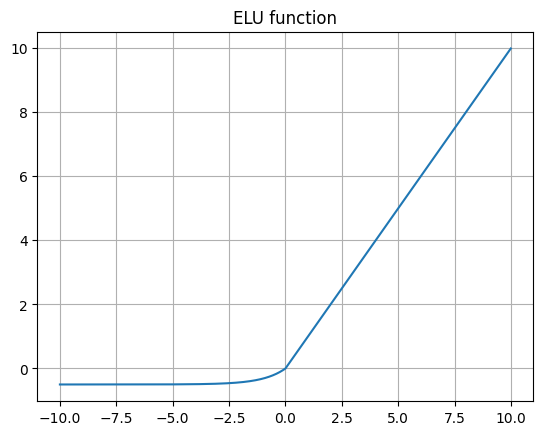

In [ ]:
def elu(a,x):
  return np.where(x > 0, x, a * (np.exp(x) - 1))
x = np.arange(-10,10,0.01)
y = elu(0.5,x)

plt.plot(x,y)
plt.title("ELU function")
plt.grid(True)
plt.show()

6. Maxout "Neuron"

  $ f(x) =  max(w_1^Tx + b_1,w_2^Tx + b2)$

* Khong có cấu trúc cụ thể như những thằng trên
* Tổng quát của ReLU và Leaky ReLU
* Không bão hòa , không "die"
* <b> Có gấp đôi lượng tham số </b>

-----------------------------------------
<b> In Practice </b>

* Top 1 : Use <b>ReLU</b> -> Cẩn thận với learing rate của bạn nếu không thì "die"
* Top 2: Use <b>Leaky ReLU</b>/<b>Maxout</b>/<b>ELU</b>
* Top 3: Có thể thử <b> tanh</b> nhưng không mong đợi nhiều
* Top 4: Không sử dụng <b>Sigmoid</b>

### <b> 2. Data Preprocessing </b>

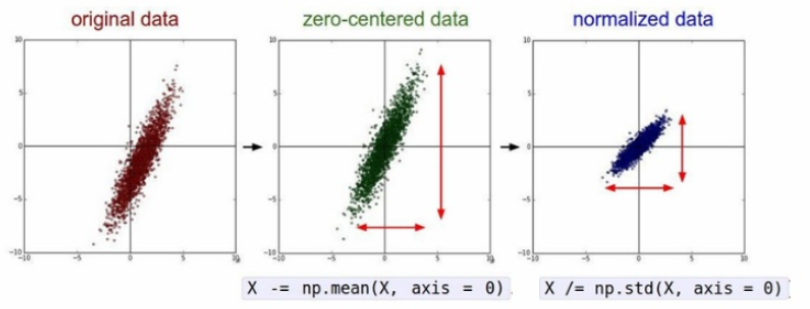

Đơn giản nhất mà chúng ta thường làm :
* Zero-centered data : $x = x - mean(x)$
* Normalized data : $ x = x / std(x)$

Vì sao lại phải làm vậy ???
* Để ko gặp vấn đề tượng tự ( Non 0-center) với khi chúng ta sử dụng hàm sigmoid. Vậy có thể dùng cách này đề khắc phục vấn đề của sigmoid ko ??? --> ko vì data preprocessing chỉ giải quyết vấn đề của lớp đầu tiên trong một mạng rất sâu ,rất nhiều lớp
* Normal để cho các chiều về cùng 1 khoảng và có cùng mức đóng góp như nhau. Tuy nhiên trong thực tế, với bài toán Computer Vision thì tường chúng ta không làm thế vì các pixel đã nằm trong một khoảng thống nhất rồi

Ngoài ra trong Machine Learning với các dạng feature khác nhau thì sẽ có nhiều phương pháp phức tạp hơn như <b>PCA</b>,...

Tuy nhiên trong thực tế(với CV) chúng ta chỉ thực hiện <b>Zeros- center</b>

* Trừ đi mean của image (AlexNet)
* Trừ đi mean của từng channel(VGGNet)


### <b>3. Weight Initialization</b>

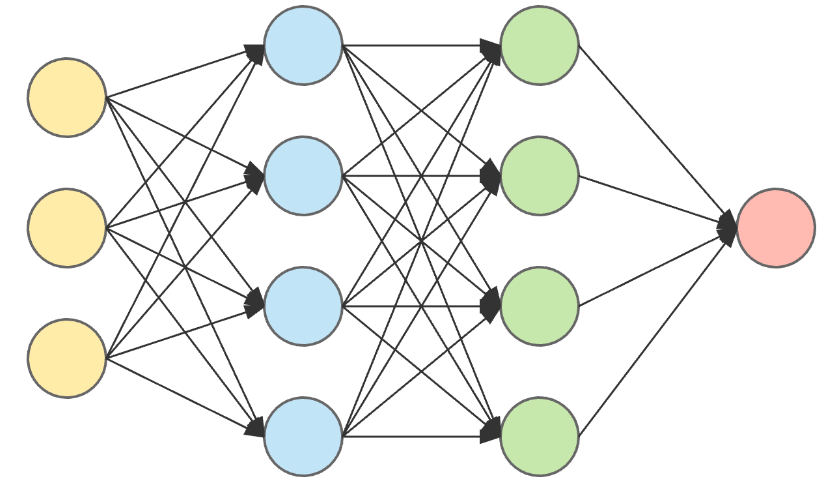

<b>Q1</b>:Điều gì sẽ xảy ra khi khởi tạo W = 0 ???

-> Tất cả các neural(trong 1 lớp) sẽ thực hiện những điều tương tự nhau

Hiểu đơn giản: Gradient($\frac{\theta L}{\theta w_i}$) sẽ dẫn đường cho các $w_i$ đến các vị trí tối ưu, nhưng do w=0 nên các gradient sẽ giống nhau, các wi sẽ học những điều giống nhau và đi đến cùng một vị trí

<b>First Ideal</b>: Khởi tạo ngẫu nhiên với các small weight

$ w = 0.01 * np.random.rand(shape)$
* <i>Nó khá tốt với các mạng nhỏ nhưng <b>gặp vấn đề với mạng sâu hơn</b></i>

In [ ]:
D =0.01*np.random.randn(1000,500)
hidden_layer_size = [500] *10
nonlinear = ['tanh'] * len(hidden_layer_size)


In [ ]:
act = {'relu':lambda x: np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
Hs ={}

for i in range(len(hidden_layer_size)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_size[i]
  w = 0.01*np.random.randn(fan_in,fan_out)

  H = np.dot(X,w)
  H = act[nonlinear[i]](H)
  Hs[i] = H

Input layer had mean 6.457168484694375e-06 and std 0.010001714154440641
Hidden layer 1 had mean -4.6190306285755494e-06 and std 0.0022370153692485403 
Hidden layer 2 had mean 1.5172350598744405e-06 and std 0.0005002583168678146 
Hidden layer 3 had mean 1.0202735230913985e-07 and std 0.00011177830964356074 
Hidden layer 4 had mean -7.365088749921812e-09 and std 2.5127589271317612e-05 
Hidden layer 5 had mean -5.2961770242501216e-09 and std 5.623354116387659e-06 
Hidden layer 6 had mean 2.1766152379668113e-09 and std 1.2600249342986797e-06 
Hidden layer 7 had mean 2.9095168527161404e-11 and std 2.8334878963023143e-07 
Hidden layer 8 had mean 1.3160625058916466e-10 and std 6.312538206464051e-08 
Hidden layer 9 had mean 4.139464365942503e-12 and std 1.4022508327701142e-08 
Hidden layer 10 had mean -1.5798321590061211e-12 and std 3.137589918759911e-09 


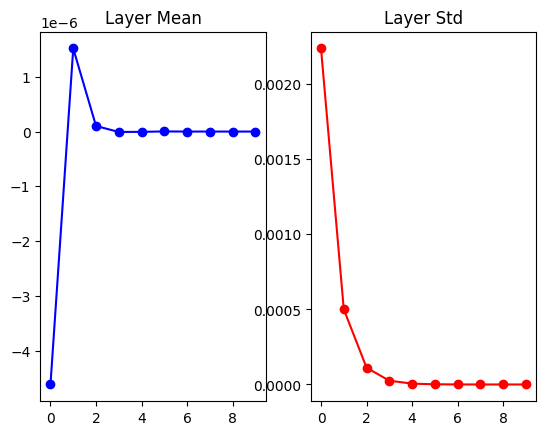

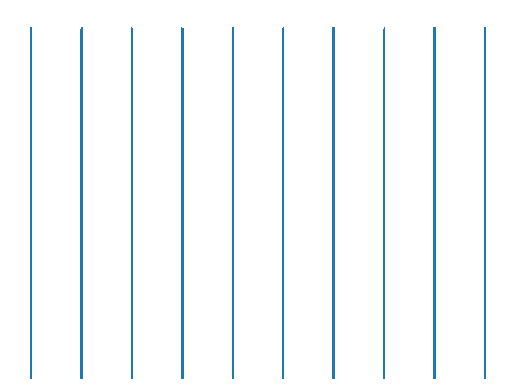

In [ ]:
print(f"Input layer had mean {np.mean(D)} and std {np.std(D)}")
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_std = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
  print(f"Hidden layer {i+1} had mean {layer_means[i]} and std {layer_std[i]} ")

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(),layer_means,'ob-')
plt.title('Layer Mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_std,'or-')
plt.title('Layer Std')

plt.figure()
for i,H in Hs.items():
  plt.subplot(1,len(Hs),i+1)
  plt.hist(H.ravel(),30,range=(-1,1))
  plt.axis(False)


Khi khởi tạo w rất nhỏ ~ 0 ...qua nhiều lớp khi được nhân nhiều lần thì w dần dần co về 0 và std nhỏ dần(như hình trên)

--> Khi đó: khi thực hiện backprop thì Gradient ~ 0 -> không được cập nhật

<b>Q2</b>: Khi khởi tạo các w lớn thì sao ???

$ W = np.random.rand(shape) * 1.0 $



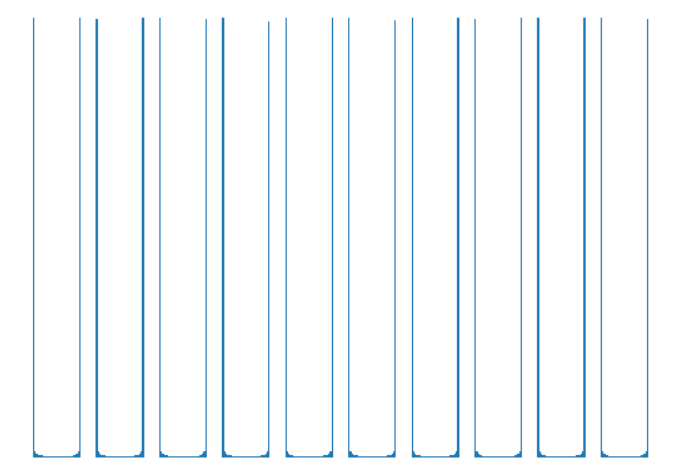

--> Tất cả các neural sẽ bị bão hòa (VD hàm tanh thì ~ -1 or 1 )

--> Gradient ~ 0 --> không được cập nhật

--> Khá là khó để thực sự khởi tạo được weight tốt khi mà nhỏ quá thì "<b>collapse</b>" mà lớn quá thì "<b>saturate</b>"

<b> Xavier Initialization (Glorot ,2010)</b>

$W = np.random.rand(shape) / np.sqrt(shape[0])$

* Về ý tưởng thì chúng ta muốn bảo toàn phương sai qua mỗi lớp tức là $Var(y) = Var(X)$

* <i>Chứng minh Xavier có thể làm được điều đó</i>

$ y = w_1x_1 + w_2x_2 + ... + b $

$ =>  var(y) = var(w_1x_1 + w_2x_2 + ...+ b) $

mà:
$ var(w_ix_i) = E(x_i)^2var(w_i) + E(w_i)^2var(x_i) + var(w_i)var(x_i)$

Trong đó E là kỳ vọng(exp) nên khi coi x và weight tuân theo Gaussian với mean = 0 thì ta được:

$ var(w_ix_i) = var(w_i)var(x_i)$

$ => var(y) = var(w_1)var(x_1) + var(w_2)var(x_2) + ... + var(w_n)var(x_n)$

vì tất cả đều có phân phối giống nhau

$ => var(y) = N*var(w_i)var(x_i)$

Vì vậy để:   $ var(y) = var (x)$

$ => var(w_i) = \frac{1}{N} $

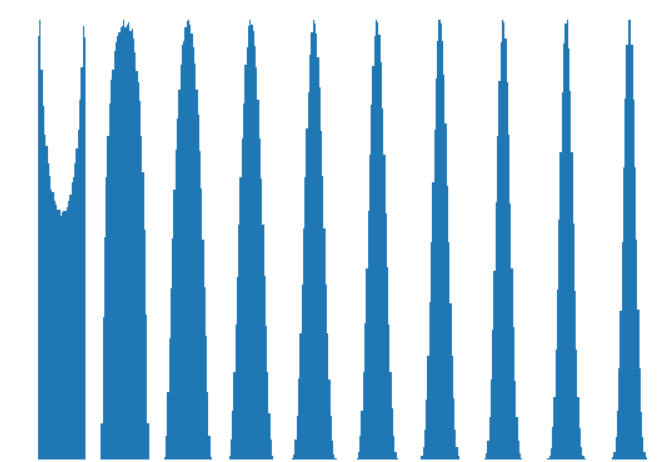

Tuy nhiên Xavier lại chỉ thích hợp cho Tanh() hoặc Sigmoid() vì với ReLU() cách khởi tạo Xavier sẽ "kill" một nửa gradient của bạn và phương sai sẽ giảm đi một nửa

**He Weight Initialization (2015)**

$ W = np.random.rand(fan_{in},fan_{out})/np.sqrt(fan_{in}/2)$

In [2]:
D =np.random.randn(1000,500)/np.sqrt(1000/2)
hidden_layer_size = [500] *10
nonlinear = ['relu'] * len(hidden_layer_size)

In [3]:
act = {'relu':lambda x: np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
Hs ={}

for i in range(len(hidden_layer_size)):
  X = D if i == 0 else Hs[i-1]
  fan_in = X.shape[1]
  fan_out = hidden_layer_size[i]
  w = np.random.randn(fan_in,fan_out)/np.sqrt(fan_in/2)

  H = np.dot(X,w)
  H = act[nonlinear[i]](H)
  Hs[i] = H

Input layer had mean 5.074334448933052e-05 and std 0.04472395537313002
Hidden layer 1 had mean 0.02520061505387652 and std 0.036941431081487126 
Hidden layer 2 had mean 0.024534931017451873 and std 0.03657876567718895 
Hidden layer 3 had mean 0.02301535738582233 and std 0.03492672894841257 
Hidden layer 4 had mean 0.023517450336382112 and std 0.03501251750194596 
Hidden layer 5 had mean 0.022369970482618594 and std 0.03408469911539903 
Hidden layer 6 had mean 0.023169855896555742 and std 0.03494763791324772 
Hidden layer 7 had mean 0.02375409648219776 and std 0.03439631163870179 
Hidden layer 8 had mean 0.023647477592608802 and std 0.03448911579295541 
Hidden layer 9 had mean 0.02564137314430818 and std 0.037084906606654006 
Hidden layer 10 had mean 0.027103254296907426 and std 0.03868261746925741 


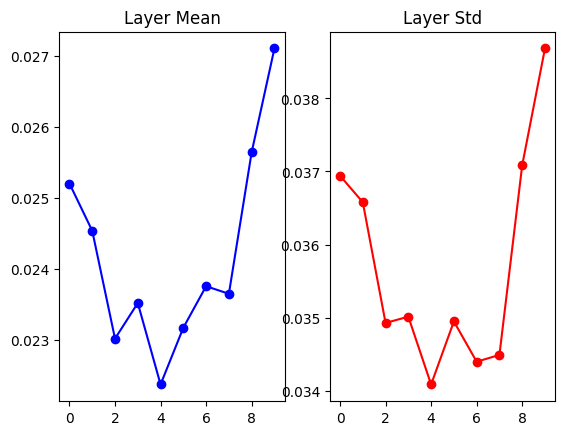

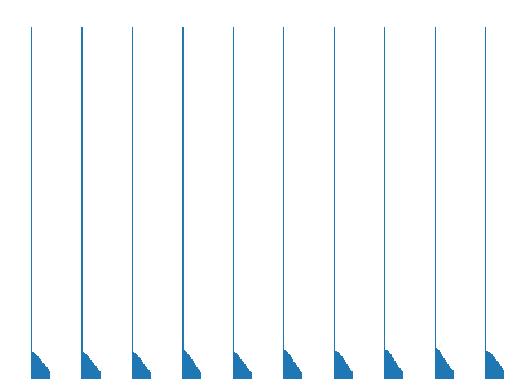

In [6]:
print(f"Input layer had mean {np.mean(D)} and std {np.std(D)}")
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_std = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
  print(f"Hidden layer {i+1} had mean {layer_means[i]} and std {layer_std[i]} ")

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(),layer_means,'ob-')
plt.title('Layer Mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_std,'or-')
plt.title('Layer Std')

plt.figure()
for i,H in Hs.items():
  plt.subplot(1,len(Hs),i+1)
  plt.hist(H.ravel(),30,range=(-0.1,0.1))
  plt.axis(False)

### <b>4. Batch Normalization</b>